In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the data matrix
A = np.loadtxt('mysterious_data.txt')
n,d = A.shape
print(f'The matrix A contains {n} points in dimension {d}')

The matrix A contains 3000 points in dimension 1000


Each row of $A$ corresponds to a datapoint.

In [3]:
#Center data points
A = A.T
for data in A:
    for i in range(len(data)):
        data[i] -= data.mean()

#Compute covariance matrix S
S = A @ A.T

In [5]:
#Compute Eigencomposition of S
lambda_, v = np.linalg.eigh(S)
#lamda, v

In [6]:
#Sort eigenvalues lamda and corresponding eigenvectors 
lambda_.sort
lambda_sorted = list(reversed(lambda_))
lambda_sorted[:10]

[4476296.59918176,
 1250514.6406766449,
 298419.7702455254,
 293926.29528067005,
 293775.90135087806,
 292862.97320488835,
 290671.53168922535,
 287649.1930241093,
 286320.07237720175,
 281818.74827767024]

In [11]:
_#Keep the first two largest eigenvalues since there is a large difference between the second and
#the third largest eigenvalue
lambda_1 = lambda_sorted[0]
lambda_2 = lambda_sorted[1]

#Obtain eigenvectors corresponding to these to eigenvalues
index_1 = lambda_.tolist().index(lambda_1)
index_2 = lambda_.tolist().index(lambda_2)

v1 = v[:,index_1]
v2 = v[:,index_2]

#Compute dimension-reduced data points
V = np.array([v1.tolist(), v2.tolist()]).T 
new_A = V.T @ A
new_A

array([[ 52.30493379, -19.25007336,  -9.6700891 , ...,  70.27730308,
         48.41484116, -17.60611026],
       [  9.72439051,  27.20892818, -22.19978718, ...,  27.01385212,
        -27.10992083,  -9.8942952 ]])

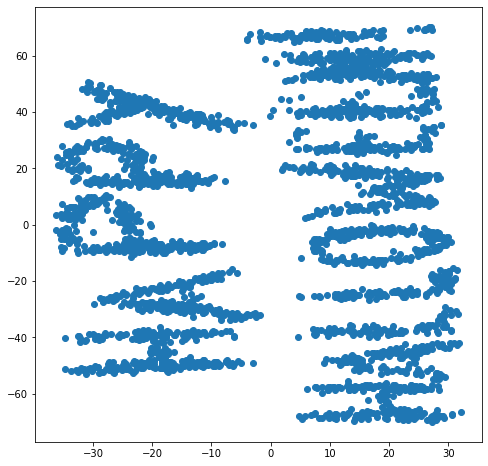

In [15]:
plt.figure(figsize=(8, 8))
plt.scatter(new_A.T[:,1],new_A.T[:,0]);